Importing the **libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk.tokenize
import json
import datetime
import warnings
warnings.filterwarnings("ignore")

**Reading the datasets**

In [ ]:
tweets_iaeaorg=pd.read_csv('/content/drive/MyDrive/1stProject/TweetsOfficialAccountsArranged/iaeatweetsarr.csv').drop(columns='Unnamed: 0')
tweets_nrcgov=pd.read_csv('/content/drive/MyDrive/1stProject/TweetsOfficialAccountsArranged/nrctweetsarr.csv').drop(columns='Unnamed: 0')
tweets_wecnuclear=pd.read_csv('/content/drive/MyDrive/1stProject/TweetsOfficialAccountsArranged/westinghousetweetsarr.csv').drop(columns='Unnamed: 0')
tweets_ctbto=pd.read_csv('/content/drive/MyDrive/1stProject/TweetsOfficialAccountsArranged/ctbtotweetsarr.csv').drop(columns='Unnamed: 0')
tweets_worldnuclear=pd.read_csv('/content/drive/MyDrive/1stProject/TweetsOfficialAccountsArranged/worldnucleartweetsarr.csv').drop(columns='Unnamed: 0')
tweets_worldnuclearnews=pd.read_csv('/content/drive/MyDrive/1stProject/TweetsOfficialAccountsArranged/worldnuclearnewstweetsarr.csv').drop(columns='Unnamed: 0')
tweets_americannuclearsociety=pd.read_csv('/content/drive/MyDrive/1stProject/TweetsOfficialAccountsArranged/ANStweetsarr.csv').drop(columns='Unnamed: 0')
tweets_govenergynuclear=pd.read_csv('/content/drive/MyDrive/1stProject/TweetsOfficialAccountsArranged/NEofficetweetsarr.csv').drop(columns='Unnamed: 0')
tweets_nea=pd.read_csv('/content/drive/MyDrive/1stProject/TweetsOfficialAccountsArranged/NEAtweetsarr.csv').drop(columns='Unnamed: 0')

Rearrange the dataframes to obtain nice graphs.

In [ ]:
def adding_features(dataframe):
  """This functio adds the datetime format to the date and the week number for aggregation"""
  dataframe = dataframe.astype({'Date':'datetime64[ns]'})
  dataframe['week_number']=dataframe['Date'].dt.week
  return dataframe
tweets_iaeaorg = adding_features(tweets_iaeaorg)
tweets_nrcgov = adding_features(tweets_nrcgov)
tweets_wecnuclear = adding_features(tweets_wecnuclear)
tweets_ctbto = adding_features(tweets_ctbto)
tweets_worldnuclear = adding_features(tweets_worldnuclear)
tweets_worldnuclearnews = adding_features(tweets_worldnuclearnews)
tweets_americannuclearsociety = adding_features(tweets_americannuclearsociety)
tweets_govenergynuclear = adding_features(tweets_govenergynuclear)
tweets_nea = adding_features(tweets_nea)


In [ ]:
def timeseries_retfavs(dataframe):
  """
  This function plots the retweet_counts and/or favorites counts of each account in the time 
  """
  dataframe.sort_values(by='Retweet counts',ascending=False).plot(x='Date',y=['Retweet counts','Favorites counts'],colormap='Pastel1',alpha=0.9)
  #dataframe.sort_values(by='Retweet counts',ascending=False).plot(x='Date',y=['Retweet counts'],colormap='Pastel1',alpha=0.9)
  #dataframe.sort_values(by='Retweet counts',ascending=False).plot(x='Date',y=['Favorites counts'],colormap='Pastel1',alpha=0.9)
  plt.title(dataframe['User Name'][0])
  plt.ylabel('Counts')
  plt.xlim(min(dataframe['Date']),max(dataframe['Date']))
  plt.xticks(rotation = 80)
  return

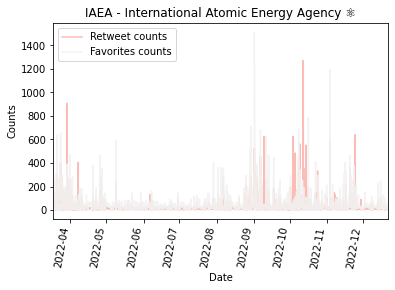

In [ ]:
timeseries_retfavs(tweets_iaeaorg) 

The previous graphs display the interaction of the users in twitter for the 9 different usernames via the retweet and favorite buttons that are quick ways to interact with the tweet. Therefore, it obviously indicates the interest from people about the tweet and how the topics in these tweets are more appealing and interesting for the community. *As a future work it may be interesting to simply search for these publications in detail, what are they about, what are the hashtags used for them and what are the topics that people were more interested in.*
Note that favorites and retweets are different subjects as retweeting you focus on the twitter account while retweet is only alowable in retweets.

In [ ]:
tweets_iaeaorg.sort_values(by='Retweet counts',ascending=False).head()

In [ ]:
tweets_iaeaorg.sort_values(by='Favorites counts',ascending=False).head()

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize